In [86]:
# Imort main libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for photing and viewing data
import matplotlib.pyplot as plt# plotting library
import os, math
import yfinance as yf
# For Model and apply RNN + LSTM
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed 

In [6]:
yf_amzn = yf.Ticker("AMZN")
df = yf_amzn.history(period='max')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000,0,0.0
1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000,0,0.0
1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800,0,0.0
1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200,0,0.0
1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200,0,0.0


# Now Plots

Text(0.5, 1.0, 'Anazon Stock at all time')

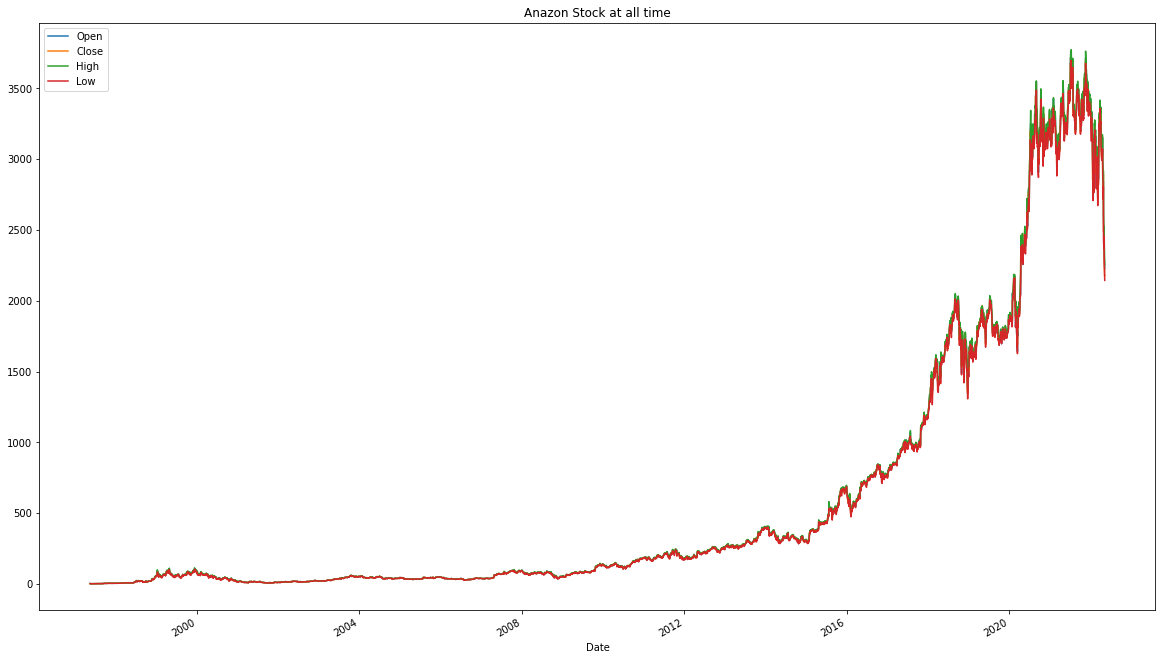

In [5]:
df[['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('Anazon Stock at all time')

Text(0, 0.5, 'Stock action')

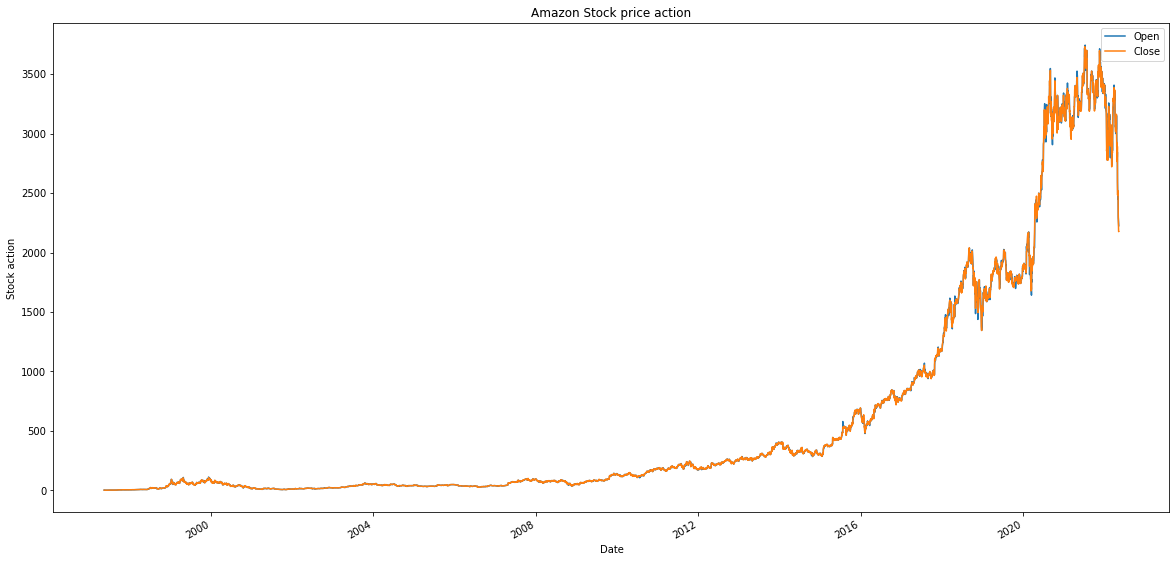

In [7]:
df[['Open','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

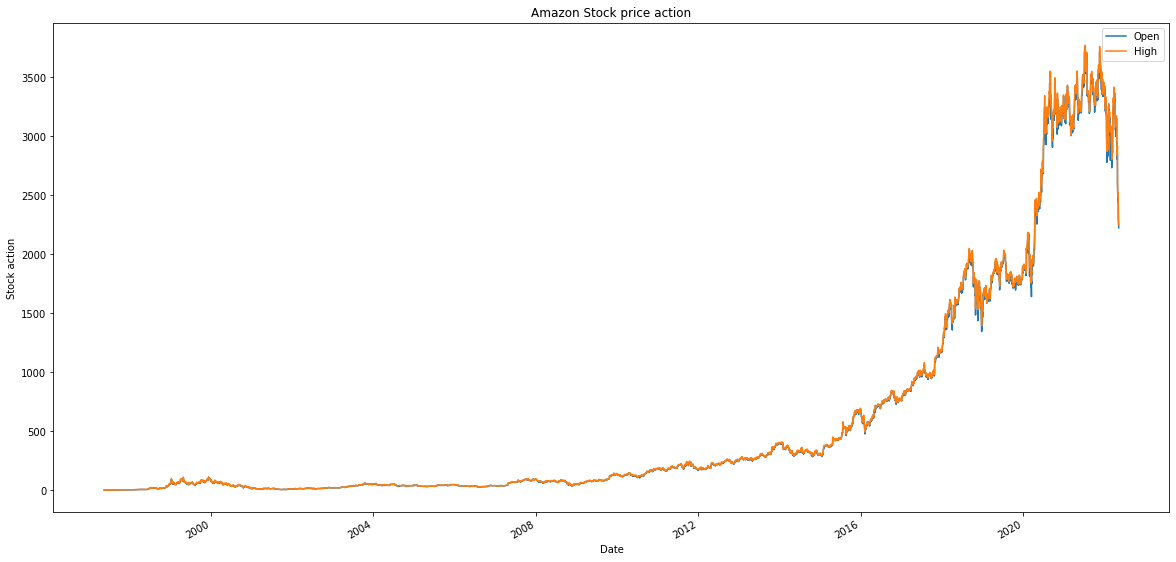

In [8]:
df[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

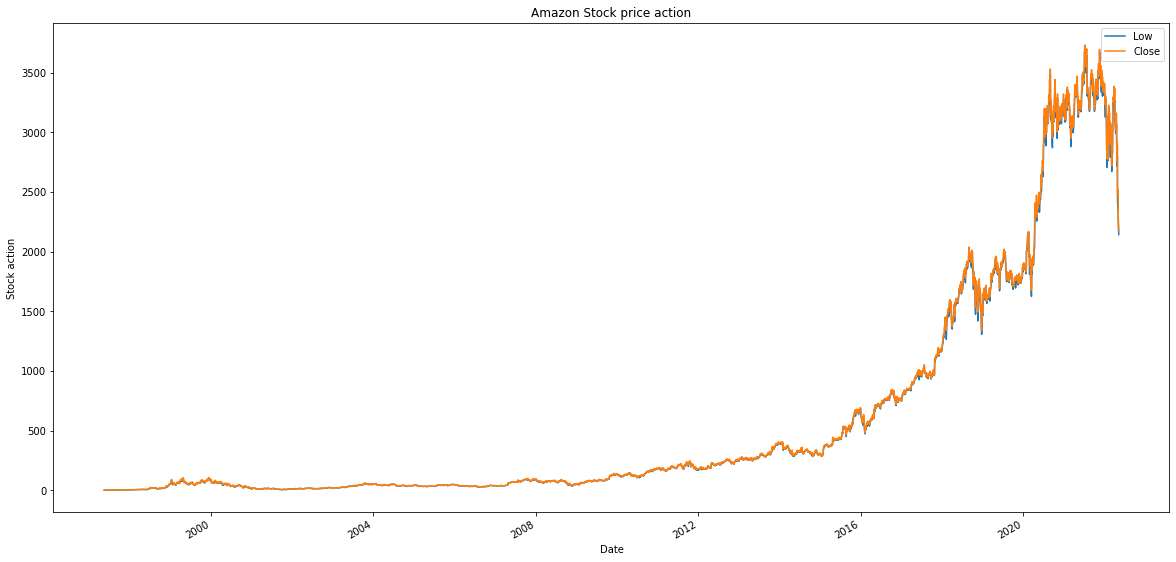

In [9]:
df[['Low','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

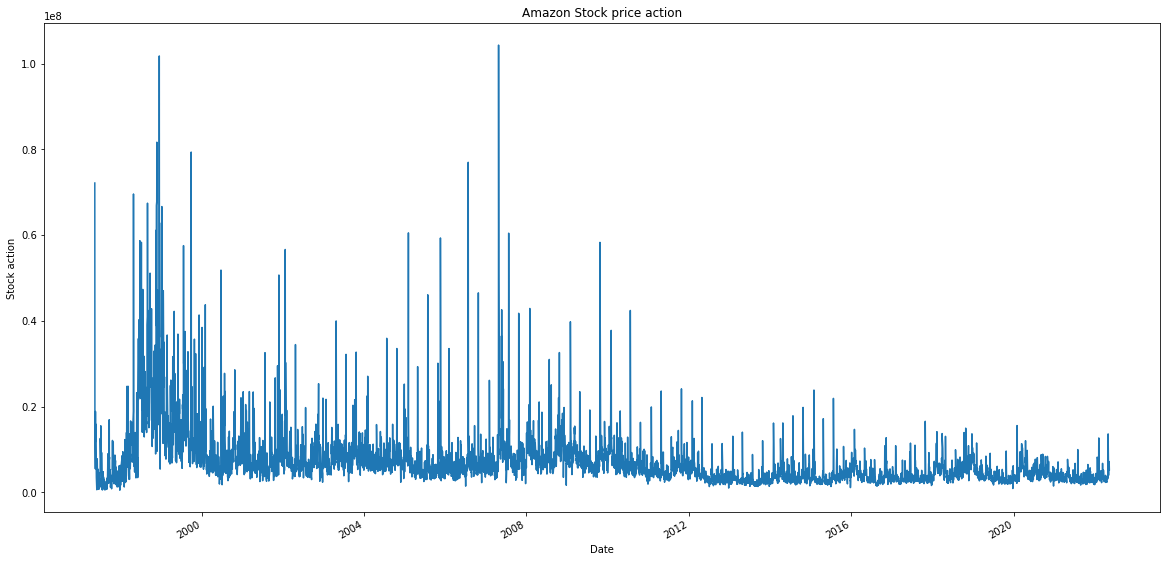

In [10]:
df['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

# From the previous analysis and visualization, it can take teh data fro 2015 as the previous years doesn't important, not have a stock price variance

Text(0.5, 1.0, 'Amazon Stock Price Action form 2012 to 2021')

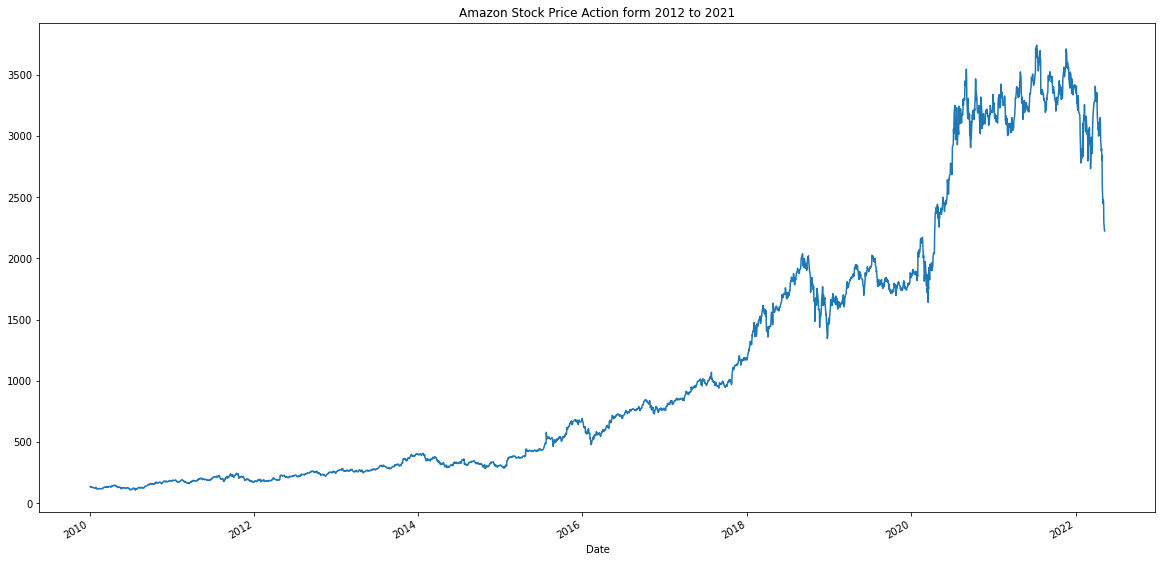

In [14]:
# Ama = df['2010':'2022']
Ama = df['2010':]
Ama['Open'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2012 to 2021')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2012 to 2021')

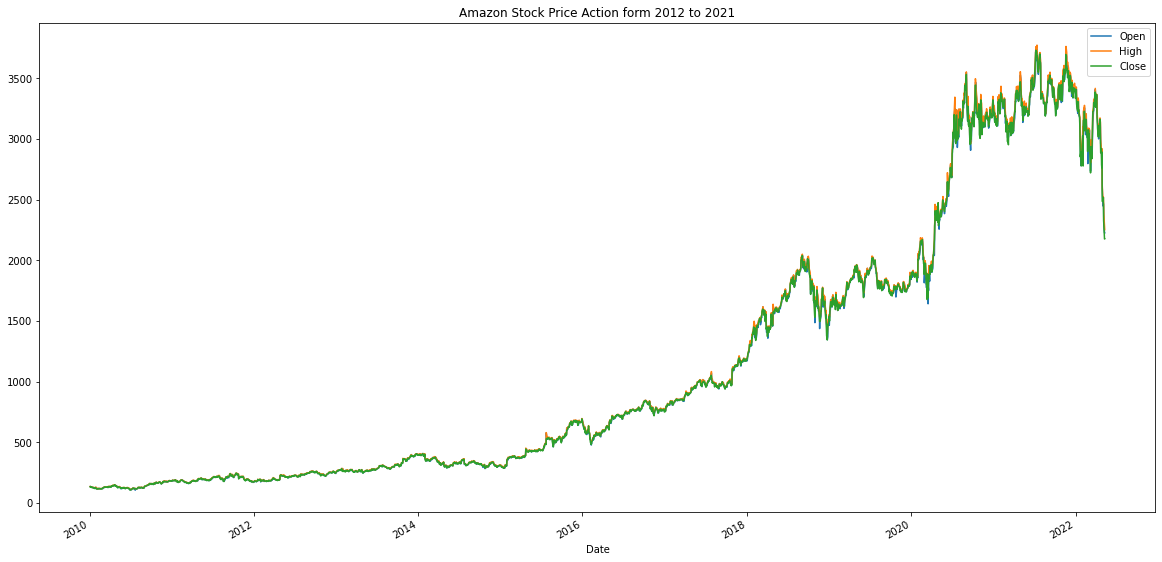

In [16]:
Ama[['Open','High', 'Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2012 to 2021')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2022')

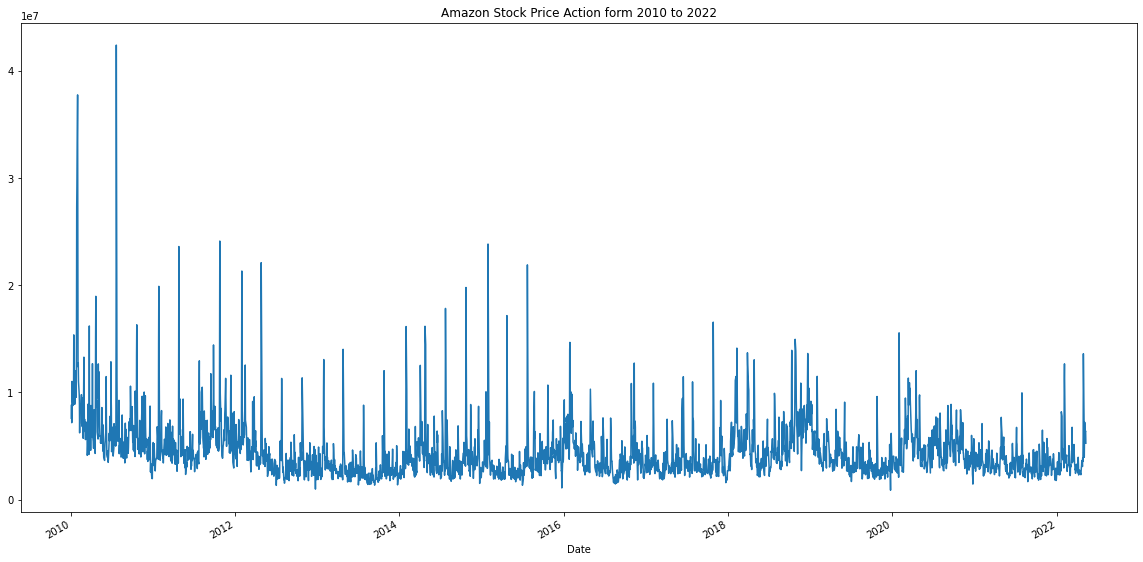

In [17]:
Ama['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2022')

In [18]:
Ama.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3110.000000,3110.000000,3110.000000,3110.000000,3.110000e+03,3110.0,3110.0
mean,1123.072271,1135.143179,1109.369624,1122.456820,4.454570e+06,0.0,0.0
std,1079.320107,1091.433104,1065.381493,1078.157274,2.696769e+06,0.0,0.0
min,105.930000,111.290001,105.800003,108.610001,8.813000e+05,0.0,0.0
25%,260.144997,262.937500,257.029999,260.257492,2.812400e+06,0.0,0.0
50%,648.875000,657.799988,640.035004,645.554993,3.757150e+06,0.0,0.0
75%,1789.700012,1801.617462,1771.239990,1788.507477,5.251750e+06,0.0,0.0
max,3744.000000,3773.080078,3696.790039,3731.409912,4.242110e+07,0.0,0.0


# Augmented Dickey Fuller Test (ADF)

ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
   #Perform Dickey-Fuller test:
   print ('Results of Dickey-Fuller Test:')
   dftest = adfuller(timeseries, autolag='AIC')
   dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
   for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
   return dfoutput

In [20]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                    0.350580
p-value                           0.979550
#Lags Used                       31.000000
Number of Observations Used    6257.000000
Critical Value (1%)              -3.431396
Critical Value (5%)              -2.862002
Critical Value (10%)             -2.567016
dtype: float64


In [21]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                  -1.758815
p-value                          0.401092
#Lags Used                      14.000000
Number of Observations Used    286.000000
Critical Value (1%)             -3.453423
Critical Value (5%)             -2.871699
Critical Value (10%)            -2.572183
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                  -1.655007
p-value                          0.454430
#Lags Used                      13.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


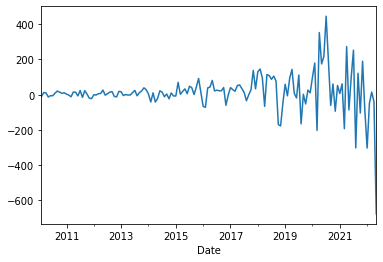

In [22]:
Ama_diff = Ama['Open'].resample('MS').mean() - Ama['Open'].resample('MS').mean().shift(1)
Ama_open_diff = Ama_diff.dropna()
Ama_open_diff.plot()
print(adf_test(Ama_open_diff))

# Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS)
another test for checking the stationarity of a time series

In [24]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [25]:
kpss_test(Ama['High'])

Results of KPSS Test:
Test Statistic            8.164884
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/home/lsj/.pyenv/versions/3.8.11/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


/tmp/ipykernel_3325/3429100400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ama["High_diff"] = Ama["High"] - Ama["High"].shift(1)


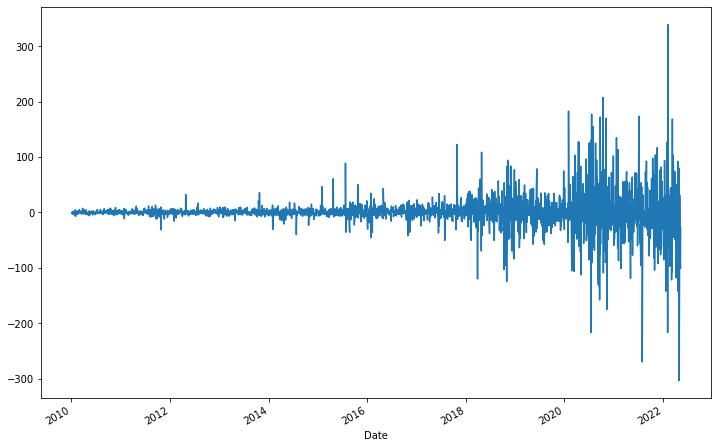

In [26]:
Ama["High_diff"] = Ama["High"] - Ama["High"].shift(1)
Ama["High_diff"].dropna().plot(figsize=(12, 8))

In [27]:
kpss_test(Ama['High_diff'].dropna())

Results of KPSS Test:
Test Statistic            0.12399
p-value                   0.10000
Lags Used                10.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/home/lsj/.pyenv/versions/3.8.11/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [28]:
kpss_test(Ama['High_diff'].resample('MS').mean().dropna())

Results of KPSS Test:
Test Statistic           0.165939
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/home/lsj/.pyenv/versions/3.8.11/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [29]:
kpss_test(Ama['High_diff'].resample('MS').std().dropna())

Results of KPSS Test:
Test Statistic           1.408566
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/home/lsj/.pyenv/versions/3.8.11/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [30]:
adf_test(Ama['High_diff'].dropna())

Results of Dickey-Fuller Test:


Test Statistic                -1.101185e+01
p-value                        6.296359e-20
#Lags Used                     2.900000e+01
Number of Observations Used    3.079000e+03
Critical Value (1%)           -3.432476e+00
Critical Value (5%)           -2.862479e+00
Critical Value (10%)          -2.567270e+00
dtype: float64

# Data Preprocessing

In [79]:
train_Ama = Ama['High'].iloc[:-4]

# Take ramdom  6 variables 

X_train=[]
y_train=[]

for i in range(2, len(train_Ama)):
    X_train.append(train_Ama[i-2:i])
    y_train.append(train_Ama[i])

In [70]:
Ama['High'].iloc[:-4][:2]

Date
2010-01-04    136.610001
2010-01-05    135.479996
Name: High, dtype: float64

In [83]:
def get_train_data(n_days: int, yf_data: pd.DataFrame):
    '''yf_data is the data from yfinance'''
    X_train=[]
    y_train=[]
    for i in range(n_days, len(train_Ama)):
        X_train.append(train_Ama[i-n_days:i])
        y_train.append(train_Ama[i])
    X_train = np.array(X_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    return X_train, np.array(y_train)


In [84]:
X_train, y_train = get_train_data(2, Ama['High'])

In [85]:
import math
train_len = math.ceil(len(train_Ama)*0.8)
train_len


2485

In [87]:
# X_train.reshape(X_train.shape[0], X_train.shape[1], 1).shape


In [88]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2022-05-11 01:21:35.121529: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-11 01:21:35.121613: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-11 01:21:35.121631: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-KH2BV74): /proc/driver/nvidia/version does not exist
2022-05-11 01:21:35.122504: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


32/32 - 1s - loss: 2518012.2500 - 830ms/epoch - 26ms/step
Epoch 2/10
32/32 - 0s - loss: 1270458.6250 - 82ms/epoch - 3ms/step
Epoch 3/10
32/32 - 0s - loss: 14690.2373 - 80ms/epoch - 3ms/step
Epoch 4/10
32/32 - 0s - loss: 1559.2241 - 96ms/epoch - 3ms/step
Epoch 5/10
32/32 - 0s - loss: 1069.4277 - 76ms/epoch - 2ms/step
Epoch 6/10
32/32 - 0s - loss: 1069.8512 - 81ms/epoch - 3ms/step
Epoch 7/10
32/32 - 0s - loss: 1065.8477 - 80ms/epoch - 2ms/step
Epoch 8/10
32/32 - 0s - loss: 1075.4944 - 77ms/epoch - 2ms/step
Epoch 9/10
32/32 - 0s - loss: 1063.9298 - 77ms/epoch - 2ms/step
Epoch 10/10
32/32 - 0s - loss: 1082.3971 - 76ms/epoch - 2ms/step


<AxesSubplot:>

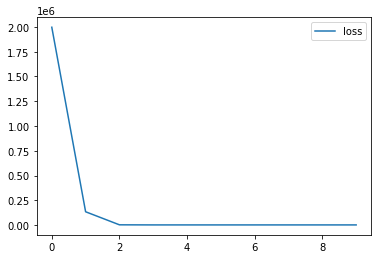

In [35]:
losse = pd.DataFrame(model.history.history)
losse[['loss']].plot()

In [89]:
test_data = train_Ama[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [90]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)

In [91]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 32.57825885033882
Validation rmse: 65.51504271537249


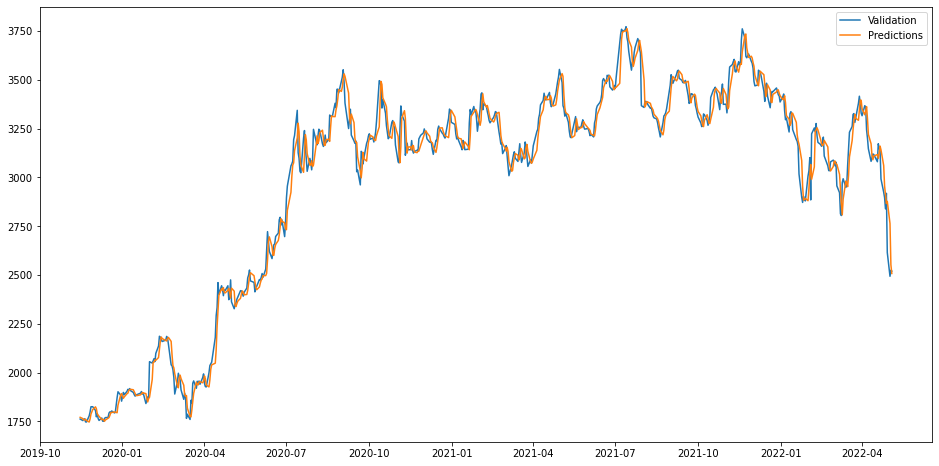

In [92]:
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [40]:
# data frame to see the percentage of error between real and predicted

variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,615.000000
mean,-6.431612
std,61.808792
min,-291.796875
25%,-42.427612
50%,-6.354248
75%,25.340942
max,226.845947


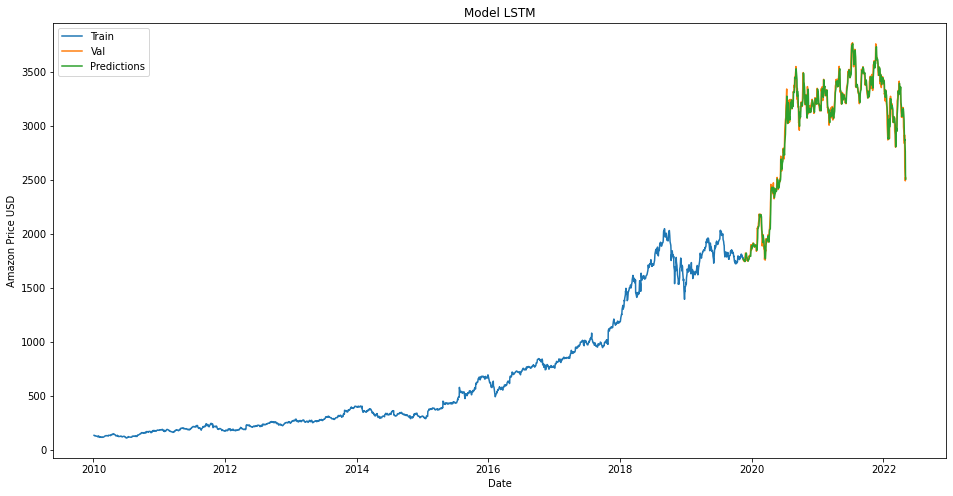

In [93]:
train = train_Ama[:train_len]
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Amazon Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()